# The Landmarks of 9ja
___
The aim of this project is to build an application that can classify eleven (11) popular natural & architectural landmarks that are in Nigeria. These landmarks include

* Bowers Tower, Ibadan, Oyo State

    *   <img src="data/bowers tower/bowerstower0.jpeg" alt="bowers tower" style="height: 300px; width:500px;"/> 

<br />

* Gidan Rumfa, Kano, Kano State

    *   <img src="data/gidan rumfa/gidanrumfa40.jpeg" alt="gidan rumfa" style="height: 300px; width:500px;"/> 

<br />

* Gurara Falls, Gurara, Niger State
    *   <img src="data/Gurara Falls/GuraraFalls19.jpeg" alt="gurara falls" style="height: 300px; width:500px;"/> 


<br />

* Kajuru Castle, Kajuru, Kaduna State

    *   <img src="data/kajuru castle/kajurucastle2.jpeg" alt="kajuru castle" style="height: 300px; width:500px;"/> 

<br />

* National Theatre, Surulere, Lagos State

    *   <img src="data/national theatre lagos/nationaltheatrelagos1.jpeg" alt="national theatre" style="height: 300px; width:500px;"/> 

<br />

* National Ecumenical Center, Abuja, Federal Capital Territory (FCT)

    *   <img src="data/national ecumenical center abuja/nationalecumenicalcenterabuja5.jpeg" alt="national ecumenical center abuja" style="height: 300px; width:500px;"/> 

<br />

* National Mosque, Abuja, FCT

    *   <img src="data/national mosque abuja/nationalmosqueabuja22.jpeg" alt="national mosque abuja" style="height: 300px; width:500px;"/> 

<br />

* Olumo Rock, Abeokuta, Ogun State

    *   <img src="data/olumo rock/olumorock181.jpeg" alt="olumo rock" style="height: 300px; width:500px;"/> 

<br />

* Osun Osogbo Sacred Grove, Osogbo, Osun State

    *   <img src="data/osun osogbo sacred grove/osunosogbosacredgrove4.jpeg" alt="osunosogbosacredgrove rock" style="height: 300px; width:500px;"/> 

<br />


* Tafawa Balewa Square (TBS), Onikan, Lagos State

    *   <img src="data/tafawa balewa square/necombuildinglagos75.jpeg" alt="tbs" style="height: 300px; width:500px;"/> 

<br />

* Zuma Rock, Abuja, FCT

    *   <img src="data/zuma rock/zumarock112.jpeg" alt="zuma rock" style="height: 300px; width:500px;"/> 

### Import libraries

In [1]:
from tensorflow import keras 
from tensorflow.keras import layers
import numpy as np

import PIL
import cv2
import pathlib

Import the data

In [2]:
# load the data
directory = pathlib.Path("data/") # dir holding data
directory

WindowsPath('data')

In [3]:
len(list(directory.glob("*/*"))) # list total number of files in dir

1440

In [4]:
zuma = list(directory.glob("zuma rock/*")) #dir holding zuma images
zuma[:10]

[WindowsPath('data/zuma rock/zumarock0.jpeg'),
 WindowsPath('data/zuma rock/zumarock1.jpeg'),
 WindowsPath('data/zuma rock/zumarock10.jpeg'),
 WindowsPath('data/zuma rock/zumarock100.jpeg'),
 WindowsPath('data/zuma rock/zumarock101.jpeg'),
 WindowsPath('data/zuma rock/zumarock102.jpeg'),
 WindowsPath('data/zuma rock/zumarock104.jpeg'),
 WindowsPath('data/zuma rock/zumarock105.jpeg'),
 WindowsPath('data/zuma rock/zumarock106.jpeg'),
 WindowsPath('data/zuma rock/zumarock108.jpeg')]

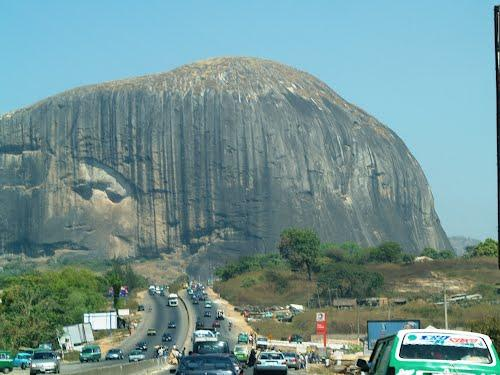

In [7]:
PIL.Image.open(str(zuma[4]))

### Data Preprocessing

Folder and Label Handling

In [9]:
# Storing image folders in a dictionary
landmark_images = {
    "gurara" : list(directory.glob("Gurara falls/*")),
    "bowers tower" : list(directory.glob("bowers tower/*")),
    "gidan rumfa" : list(directory.glob("gidan rumfa/*")),
    "kajuru castle" : list(directory.glob("kajuru castle/*")),
    "national ecumenical center abuja" : list(directory.glob("national ecumenical center abuja/*")),
    "national theatre lagos" : list(directory.glob("national theatre lagos/*")),
    "national mosque abuja" : list(directory.glob("national mosque abuja/*")),
    "olumo rock" : list(directory.glob("olumo rock/*")),
    "osun osogbo sacred grove" : list(directory.glob("osun osogbo sacred grove/*")),
    "tafawa balewa square" : list(directory.glob("tafawa balewa square/*")),
    "zuma rock" : list(directory.glob("zuma rock/*")),
}

In [10]:
# creating and storing labels for each class
landmark_labels = {
    "gurara" : 0,
    "bowers tower" : 1,
    "gidan rumfa" : 2,
    "kajuru castle" : 3,
    "national ecumenical center abuja" : 4,
    "national theatre lagos" : 5,
    "national mosque abuja" : 6,
    "olumo rock" : 7,
    "osun osogbo sacred grove" : 8,
    "tafawa balewa square" : 9,
    "zuma rock" : 10,
}

converting images to tensors

In [11]:
X, y = [], [] # initializing X, y data in lists
null = []

for cap_name, images in landmark_images.items():
    for image in images:
        img = cv2.imread(str(image)) # get path of image
        try:
            img = cv2.resize(img, (224, 224)) # convert into tensor of 224 * 224 pixels
            X.append(img) # store tensor in X data
            y.append(landmark_labels[cap_name]) # store label in y data
        except:
            null.append(img) # if image is corrupted remove                    

In [12]:
X = np.array(X)
y = np.array(y)

Data Split

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=51, stratify=y, test_size=0.2)

In [15]:
X_train.shape, X_test.shape

((1016, 224, 224, 3), (254, 224, 224, 3))

Normalize data /Scaling

In [16]:
X_train = X_train / 255
X_test = X_test / 255

### Model Building

Data Augmentation: To Avoid Overfitting and Create More Images that may improve perfomance

In [17]:
data_augmentation = keras.Sequential([
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

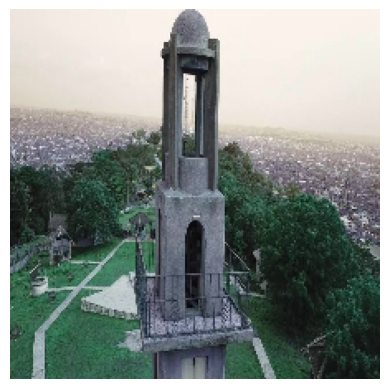

In [18]:
import matplotlib.pyplot as plt

plt.axis("off")
plt.imshow(X[20])

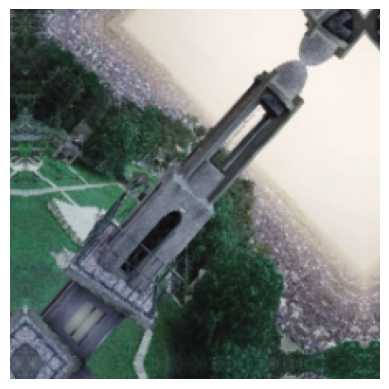

In [19]:
plt.axis("off")
plt.imshow(data_augmentation(X)[20].numpy().astype("uint8"))

### Transfer learning

In [20]:
import tensorflow_hub as hub #library to access pretrained models
import tensorflow as tf
from tensorflow import keras

Resnet 50 V2

In [21]:
resnet50 = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

94668760/94668760 [==============================] - 1s 0us/step


Fine-tuning layers to avoid overfitting and increase validation performance

In [22]:
for layer in resnet50.layers[:150]: # removing some layers used for prediction
    layer.trainable = False


In [23]:
i = layers.Input(shape=(224, 224, 3))

x = data_augmentation(i)
x = resnet50(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Dropout(0.2)(x)
# x = layers.Dense(16, activation="relu")(x)
# x = layers.Dropout(0.4)(x)
x = layers.Dense(11, activation="softmax")(x)

mv3 = keras.models.Model(i, x)
mv3.compile(optimizer=keras.optimizers.Adam(), metrics="accuracy", loss="sparse_categorical_crossentropy")
# mv3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)
mv3.fit(X_train, y_train, epochs=20)

Epoch 1/20
32/32 [==============================] - 27s 178ms/step - loss: 1.8231 - accuracy: 0.3681
Epoch 2/20
32/32 [==============================] - 4s 123ms/step - loss: 1.1690 - accuracy: 0.6604
Epoch 3/20
32/32 [==============================] - 4s 123ms/step - loss: 0.8671 - accuracy: 0.7461
Epoch 4/20
32/32 [==============================] - 4s 128ms/step - loss: 0.7369 - accuracy: 0.7904
Epoch 5/20
32/32 [==============================] - 4s 124ms/step - loss: 0.6619 - accuracy: 0.8248
Epoch 6/20
32/32 [==============================] - 4s 125ms/step - loss: 0.5749 - accuracy: 0.8445
Epoch 7/20
32/32 [==============================] - 4s 129ms/step - loss: 0.4482 - accuracy: 0.8760
Epoch 8/20
32/32 [==============================] - 4s 128ms/step - loss: 0.4029 - accuracy: 0.8996
Epoch 9/20
32/32 [==============================] - 4s 125ms/step - loss: 0.4170 - accuracy: 0.9016
Epoch 10/20
32/32 [==============================] - 4s 128ms/step - loss: 0.3240 - accuracy: 0.914

In [24]:
mv3.evaluate(X_test, y_test)

8/8 [==============================] - 3s 262ms/step - loss: 0.2640 - accuracy: 0.9213


[0.26395750045776367, 0.9212598204612732]

In [25]:
predictions = mv3.predict(X_test)
predictions = [value.argmax() for value in predictions]

8/8 [==============================] - 1s 84ms/step


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

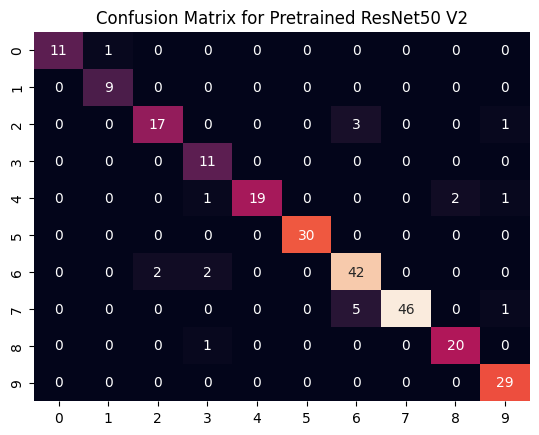

In [27]:
plt.title("Confusion Matrix for Pretrained ResNet50 V2")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);

InceptionV3

In [29]:
inception = tf.keras.applications.InceptionV3(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

87910968/87910968 [==============================] - 0s 0us/step


Fine-tuning layers to avoid overfitting and increase validation performance

In [30]:
for layer in inception.layers[:150]: # removing some layers used for prediction
    layer.trainable = False

In [31]:
i = layers.Input(shape=(224, 224, 3))

x = data_augmentation(i)
x = inception(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Flatten()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.4)(x)
x = layers.Dense(11, activation ="softmax")(x)

model = keras.models.Model(i, x)
model.compile(optimizer=keras.optimizers.Adam(0.0001), metrics="accuracy", loss="sparse_categorical_crossentropy")
# model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 34s 219ms/step - loss: 2.3948 - accuracy: 0.1476
Epoch 2/10
32/32 [==============================] - 4s 138ms/step - loss: 2.0531 - accuracy: 0.3002
Epoch 3/10
32/32 [==============================] - 4s 136ms/step - loss: 1.7168 - accuracy: 0.4065
Epoch 4/10
32/32 [==============================] - 4s 138ms/step - loss: 1.4153 - accuracy: 0.5305
Epoch 5/10
32/32 [==============================] - 4s 138ms/step - loss: 1.1187 - accuracy: 0.6398
Epoch 6/10
32/32 [==============================] - 4s 136ms/step - loss: 0.8763 - accuracy: 0.7352
Epoch 7/10
32/32 [==============================] - 4s 137ms/step - loss: 0.7341 - accuracy: 0.7638
Epoch 8/10
32/32 [==============================] - 4s 138ms/step - loss: 0.6167 - accuracy: 0.7943
Epoch 9/10
32/32 [==============================] - 4s 135ms/step - loss: 0.5364 - accuracy: 0.8366
Epoch 10/10
32/32 [==============================] - 4s 135ms/step - loss: 0.4838 - accuracy: 0.848

In [32]:
model.evaluate(X_test, y_test)

8/8 [==============================] - 3s 288ms/step - loss: 0.1939 - accuracy: 0.9331


[0.1939122974872589, 0.9330708384513855]

In [33]:
predictions = model.predict(X_test)
predictions = [value.argmax() for value in predictions]

8/8 [==============================] - 2s 68ms/step


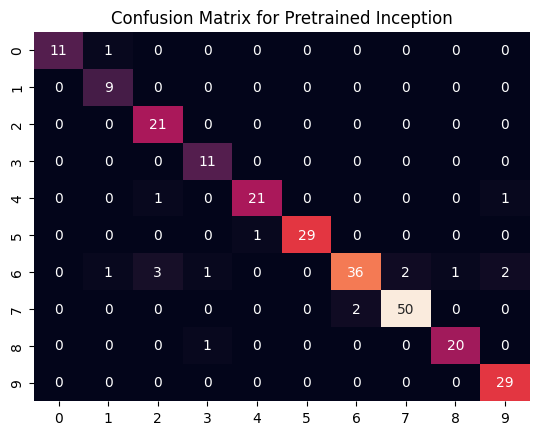

In [34]:
plt.title("Confusion Matrix for Pretrained Inception")
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, cbar=False);

In [35]:
landmark_labels = {
    "gurara" : 0,
    "bowers tower" : 1,
    "gidan rumfa" : 2,
    "kajuru castle" : 3,
    "national ecumenical center abuja" : 4,
    "national theatre lagos" : 5,
    "national mosque abuja" : 6,
    "olumo rock" : 7,
    "osun osogbo sacred grove" : 8,
    "tafawa balewa square" : 9,
    "zuma rock" : 10,
}

In [36]:
# model.save("final_model.h5")